<a href="https://colab.research.google.com/github/kusum83/Pipelines-Projects/blob/main/M505R_Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M505R - INTRO TO AI AND MACHINE LEARNING
# INDIVIDUAL FINAL PROJECT
**Submitted by : Kusum Itagi Kotreshi (GH1027001)**

**Submitted on :  July 2024**

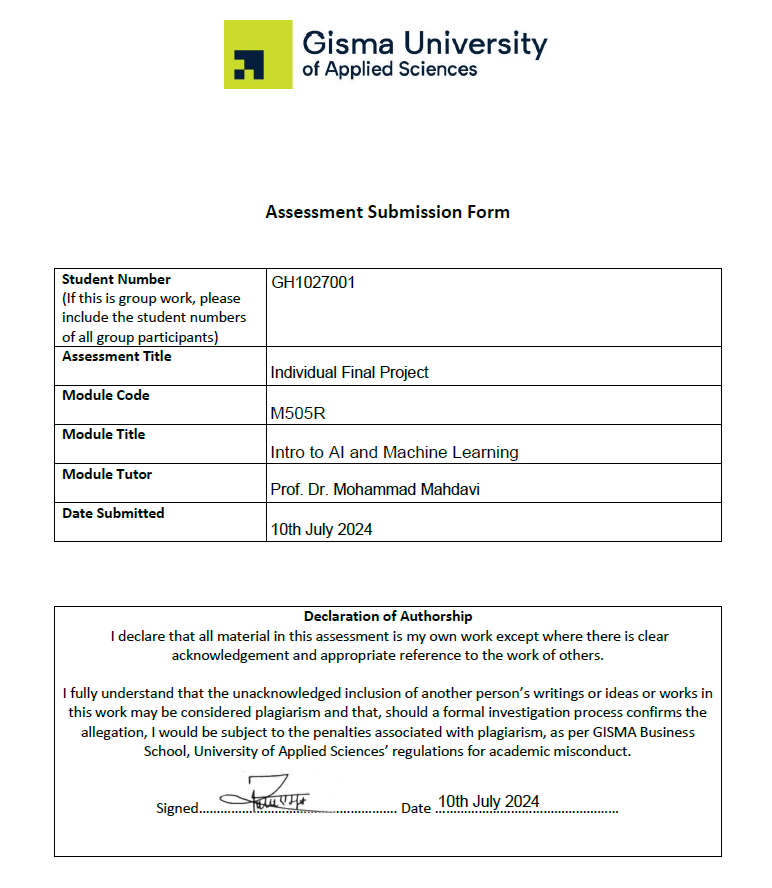

# Selected Business Problem: Predicting Diabetes for Early Intervention
Diabetes, a chronic condition with severe health complications, necessitates early detection for effective management and improved quality of life. Predicting diabetes early allows healthcare providers to implement preventive measures, reduce healthcare costs, improve patient outcomes, and allocate resources efficiently. The objective is to develop a machine learning model using health metrics such as glucose levels, blood pressure, BMI, and other features to predict diabetes accurately. The Pima Indians Diabetes dataset, containing various health attributes of Pima Indian women, is used for this task. The model will identify high-risk individuals for early intervention and continuous monitoring, enhancing preventive care and personalizing treatment plans to combat the rising prevalence of diabetes and improve patient outcomes.

# Importing Libraries

The following code has all the libraries used to perform all tasks in this note book

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.compose
import sklearn.preprocessing
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

# Loading the Dataset and Splitting it


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following code imports the mentioned CSV file into a Pandas DataFrame named df. The head() function displays the first 5 rows of the dataset.

Dataset is taken from: kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download&select=diabetes.csv

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("df size:", df.shape)
print("df train size:", df_train.shape)
print("df test size:", df_test.shape)

df size: (768, 9)
df train size: (614, 9)
df test size: (154, 9)


In [ ]:
x_train = df_train.drop('Outcome', axis=1)
y_train = df_train['Outcome']
x_test = df_test.drop('Outcome', axis=1)
y_test = df_test['Outcome']

print("X_train size:", x_train.shape)
print("Y_train size:", y_train.shape)
print("X_test size:", x_test.shape)
print("Y_test size:", y_test.shape)

X_train size: (614, 8)
Y_train size: (614,)
X_test size: (154, 8)
Y_test size: (154,)


In the above code snippets first split the dataset to train and test sets and later again split into x train, x test, y train and y test datasets. Then the sizes of each x and y strs are displayed.

# Data Exploration and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The info() function gives the information about the data including the data types and null values. This dataset has 768 rows of data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The describe() function generates descriptive statistics of all the quantitative columns of the dataset and the .T is transpose, it works by exchanging the rows and columns. Here, it is used to represent the data in a more presentable manner.

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

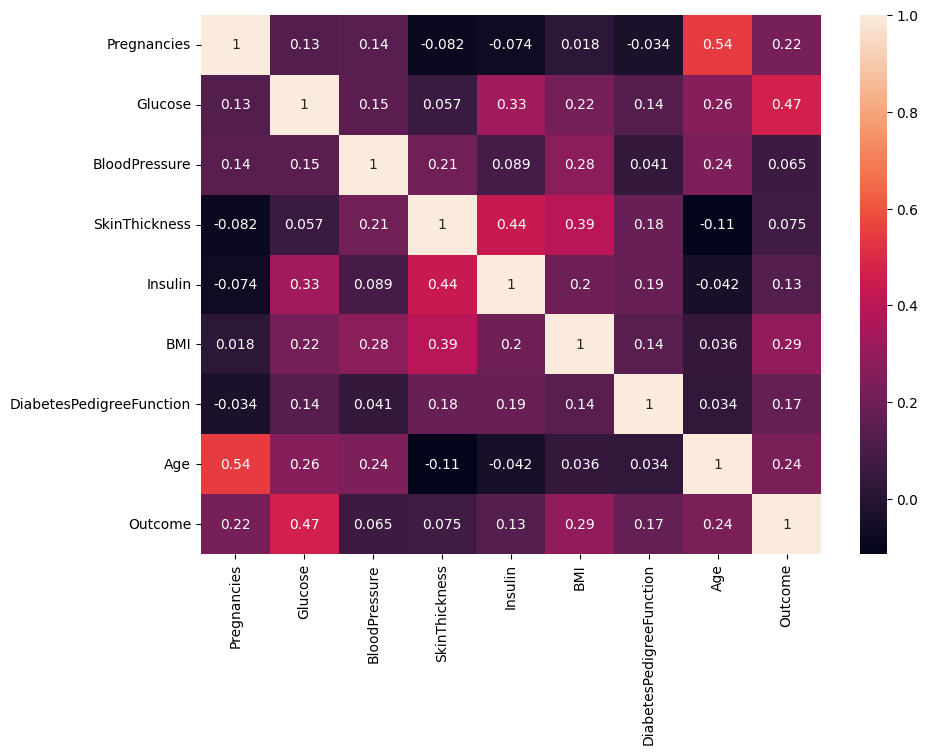

In [ ]:
mpt.figure(figsize = (10,7))
sb.heatmap(df.corr(), annot = True)

In the above code the correlation matrix that shows the relationship between all the columns/features of the dataset.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The isnull() function is used to findout if there are any null values in the dataset and the sum() function gives the total number of null values. As we can see there are no null values in the dataset

In [ ]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

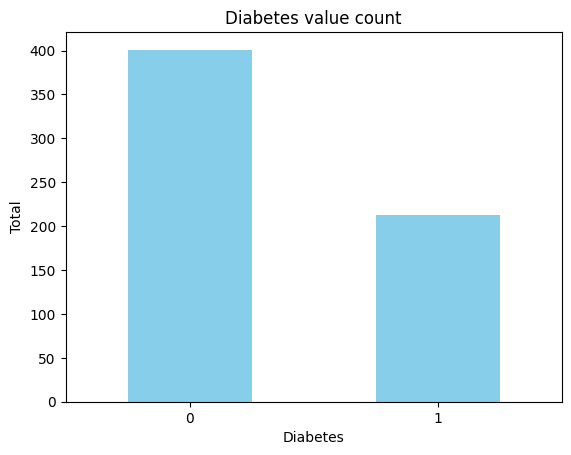

In [ ]:
y_train.value_counts().plot(kind="bar", color='skyblue')
mpt.title('Diabetes value count')
mpt.xlabel('Diabetes')
mpt.ylabel('Total')
mpt.xticks(rotation=360)
mpt.show()

From the above code we can observe that 213 number of people have diabetes and 401 people don't have diabetes.

# Feature Engineering

In [ ]:
categorical = x_train.select_dtypes(include=['object']).columns.tolist()
categorical

[]

In [ ]:
numerical = x_train.select_dtypes(include=['int64']).columns.tolist()
numerical

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

In [ ]:
numerical = x_train.select_dtypes(include=['int64']).columns.tolist()

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In the first code snippet under Feature Engineering I have checked for categorical values in the dataset, but as we can see there are no categorical values in this dataset.

In the second code snippet I have checked for numerical values in the dataset, as we can see the output shows the numerical values.

In the third code snippet selects the numerical columns from the X_train DataFrame, create an instance of StandardScaler, and standardize these columns by calculating the mean and standard deviation and then scaling them to have a mean of 0 and a standard deviation of 1. This process puts all features on the same scale, which is essential for the performance of many machine learning algorithms since it ensures good convergence for gradient-based optimizers and prevents domination by those features with larger scales in the model. It replacers that the scaled values are then stored again in the df DataFrame, replacing original values to make it most compatible for model training.

# Model Training and Evaluation
Each of the models have been trained on x train and y train data sets, then evaluated for x test dataset and the metrix like accuracy and classification report are provided for each.

# Decision Tree

In [ ]:
dt_model = dt(criterion="gini", splitter="best", max_depth=5)
dt_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
y_dt_pred = dt_model.predict(x_test)
accuracy_dt = sklearn.metrics.accuracy_score(y_test, y_dt_pred)
print(accuracy_dt)
print(sklearn.metrics.classification_report(y_test, y_dt_pred))

0.7922077922077922
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



# K Nearest Neighbor

In [ ]:
kn_scores = []
for k in range(1, 15):
  kn_model = kn(n_neighbors=k)
  score = cross_val_score(kn_model, x_train, y_train, cv=25)
  kn_scores.append(score.mean())

kn_model = kn(n_neighbors=1)
kn_model.fit(x_train, y_train)
y_kn_pred = kn_model.predict(x_test)
accuracy_kn = sklearn.metrics.accuracy_score(y_test, y_kn_pred)
print(accuracy_kn)
print(sklearn.metrics.classification_report(y_test, y_kn_pred))

0.6753246753246753
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



# Random Forest

0.7662337662337663
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



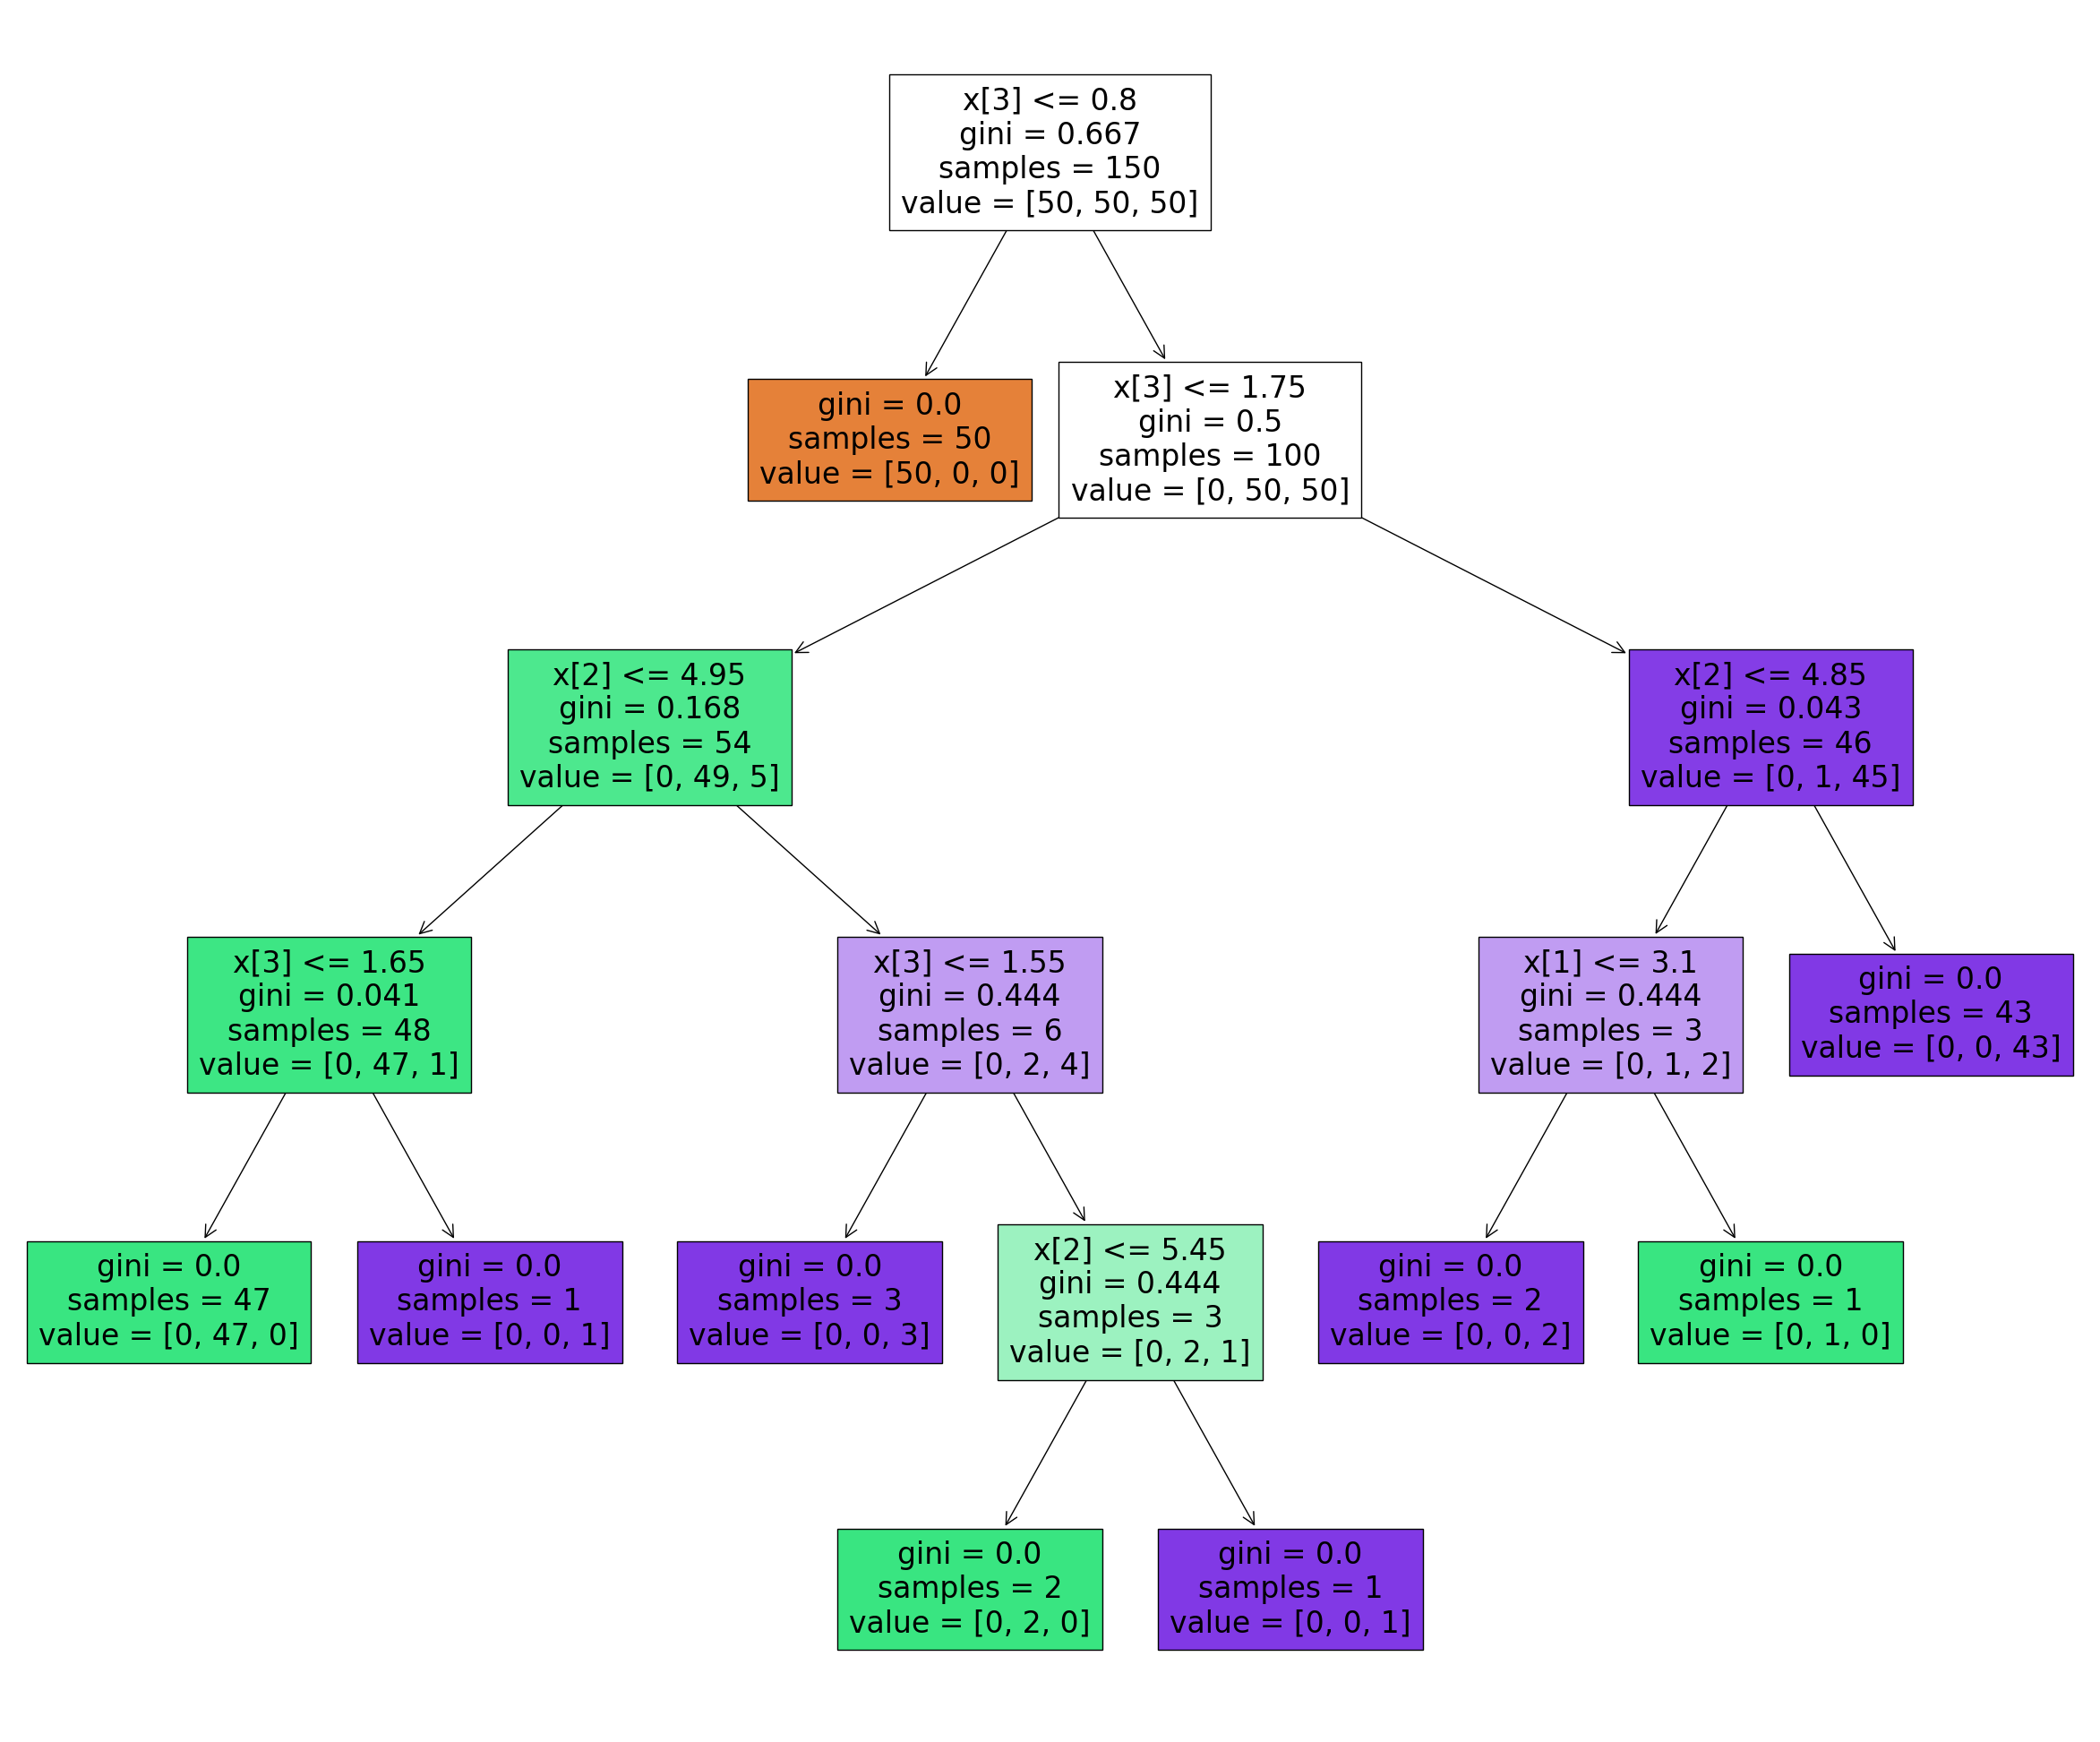

In [ ]:
rf_model = rf(n_estimators=10)
rf_model.fit(x_train, y_train)
y_rf_pred = rf_model.predict(x_test)
accuracy_rf = sklearn.metrics.accuracy_score(y_test, y_rf_pred)
print(accuracy_rf)
print(sklearn.metrics.classification_report(y_test, y_rf_pred))

iris = sklearn.datasets.load_iris()
model = dt(random_state=0)
model.fit(iris.data, iris.target)
fig = mpt.figure(figsize=(30, 25))
sklearn.tree.plot_tree(model, filled=True)
mpt.show()

#Logistic Regression

In [ ]:
lr_model = lr(max_iter=1000)
lr_model.fit(x_train, y_train)
y_lr_pred = lr_model.predict(x_test)
accuracy_lr = sklearn.metrics.accuracy_score(y_test, y_lr_pred)
print(accuracy_lr)
print(sklearn.metrics.classification_report(y_test, y_lr_pred))

0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Model Assessment
Here I have provided a summarized scores of all the models.

In [ ]:
models = {
    'Decision Tree': dt(criterion="gini", splitter="best", max_depth=5),
    'KNN': kn(n_neighbors=5),
    'Random Forest': rf(n_estimators=10),
    'Logistic Regression': lr(max_iter=1000),
}

accuracies = []
classification_reports = []

for models, m in models.items():
    m.fit(x_train, y_train)
    accuracy = m.score(x_test, y_test)
    accuracies.append((models, accuracy))
    y_pred = m.predict(x_test)
    report = sklearn.metrics.classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append((models, report))

df1 = pd.DataFrame(accuracies, columns=['Algorithm', 'Accuracy'])
print("Accuracy for each algorithm:")
print(df1)

for model_name, report in classification_reports:
    print(f"\nClassification Report for {models}:")
    print(pd.DataFrame(report).transpose())

Accuracy for each algorithm:
             Algorithm  Accuracy
0        Decision Tree  0.792208
1                  KNN  0.662338
2        Random Forest  0.772727
3  Logistic Regression  0.746753

Classification Report for Logistic Regression:
              precision    recall  f1-score     support
0              0.813084  0.878788  0.844660   99.000000
1              0.744681  0.636364  0.686275   55.000000
accuracy       0.792208  0.792208  0.792208    0.792208
macro avg      0.778882  0.757576  0.765467  154.000000
weighted avg   0.788654  0.792208  0.788094  154.000000

Classification Report for Logistic Regression:
              precision    recall  f1-score     support
0              0.752688  0.707071  0.729167   99.000000
1              0.524590  0.581818  0.551724   55.000000
accuracy       0.662338  0.662338  0.662338    0.662338
macro avg      0.638639  0.644444  0.640445  154.000000
weighted avg   0.671225  0.662338  0.665794  154.000000

Classification Report for Logistic Re

# Best Model Selection


Classification Report for Random Forest:
              precision    recall  f1-score     support
0              0.807692  0.848485  0.827586   99.000000
1              0.700000  0.636364  0.666667   55.000000
accuracy       0.772727  0.772727  0.772727    0.772727
macro avg      0.753846  0.742424  0.747126  154.000000
weighted avg   0.769231  0.772727  0.770115  154.000000


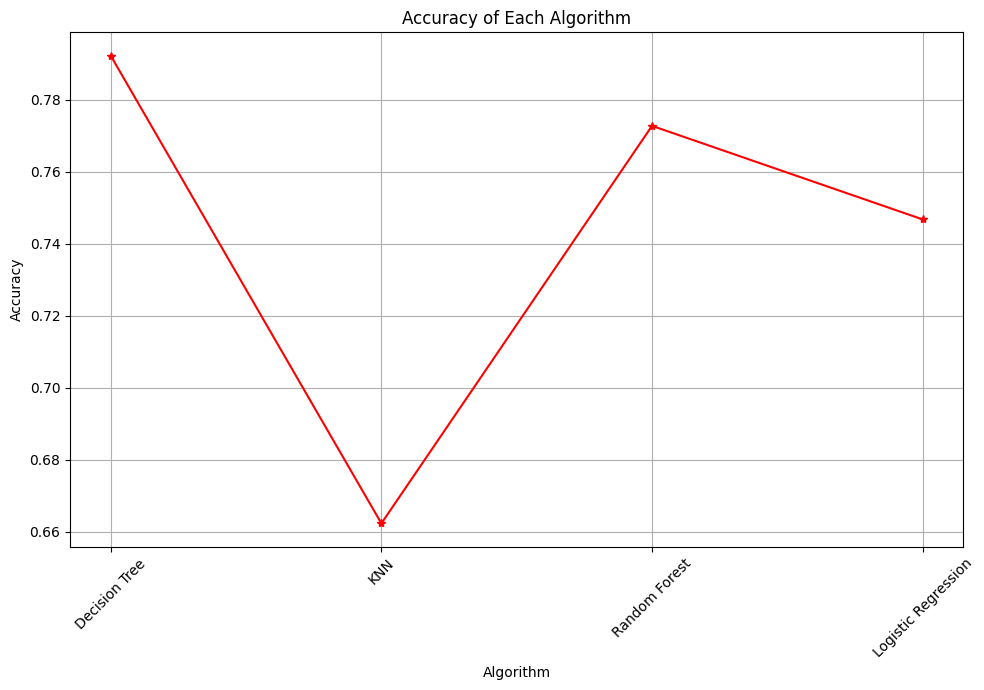

In [ ]:
best = 'Random Forest'

for models, report in classification_reports:
    if models == best:
        print(f"\nClassification Report for {models}:")
        print(pd.DataFrame(report).transpose())
        break

mpt.figure(figsize=(10, 7))
mpt.plot(df1['Algorithm'], df1['Accuracy'], marker='*', linestyle='-', color="red")
mpt.xlabel('Algorithm')
mpt.ylabel('Accuracy')
mpt.title('Accuracy of Each Algorithm')
mpt.xticks(rotation=45)
mpt.grid(True)
mpt.tight_layout()
mpt.show()

# Final Discussion and Conclusion

**Overall Strengths:**

Handling Non-Linear Datasets: Random Forest deals with nonlinear datasets, hence making it quite appropriate for diabetes prediction, which is a multi-faceted disease.
Feature Importance Insights: Equally important, this model conveys very valuable information pertaining to the factors that have the most influence on diabetes prediction. This would improve medical understanding and thus put forth effective prevention strategies.

**Overall Limitations:**

Complexity and Interpretability: Even with all of its strengths, Random Forest is more complex and less interpretable than simpler models like logistic regression. This can raise challenges in understanding the model's logic of decision-making and effectively communicating the results to non-technical stakeholders.
Implications for the Business Problem
This random forest model may thus help in the identification of those predisposed to developing diabetes and allow healthcare providers to act on that risk.

The early identification will allow timely intervention that may:

* Lower the Costs of Treatment: When pre-diabetes is prevented or delayed, it reduces healthcare expenditure on advanced treatments and hospitalizations.

* Improve Patient Outcomes: Timely intervention and personalized care plans can significantly enhance patient health outcomes and quality of life.

**Conclusion**

The random forest model literately gives the best accuracy in predicting Diabetes from the Pima Indians dataset. Feature importance insights from the model can act as a driver to further medical research and aide developing preventive measures. A prediction pipeline applied to health systems will improve timely identification and management of diabetes, benefiting both patients and medical practices. Early identification will give an appropriate opportunity for healthcare providers to concentrate on preventive measures and total customization of the treatment plan, hence reducing the load from this disease.